# Benchmark the NLOscillator test function

In [1]:
import openturns as ot
import otbenchmark as otb
import openturns.viewer as otv

In [2]:
problem = otb.NLOscillatorSensitivity()

In [3]:
print(problem)

name = N.L. Oscillator
distribution = ComposedDistribution(class=ParametrizedDistribution parameters=class=LogNormalMuSigma name=Unnamed mu=21.5 sigma=2.15 gamma=0 distribution=class=LogNormal name=LogNormal dimension=1 muLog=3.06308 sigmaLog=0.0997513 gamma=0, class=ParametrizedDistribution parameters=class=LogNormalMuSigma name=Unnamed mu=1.5 sigma=0.15 gamma=0 distribution=class=LogNormal name=LogNormal dimension=1 muLog=0.40049 sigmaLog=0.0997513 gamma=0, class=ParametrizedDistribution parameters=class=LogNormalMuSigma name=Unnamed mu=0.01 sigma=0.001 gamma=0 distribution=class=LogNormal name=LogNormal dimension=1 muLog=-4.61015 sigmaLog=0.0997513 gamma=0, class=ParametrizedDistribution parameters=class=LogNormalMuSigma name=Unnamed mu=1 sigma=0.2 gamma=0 distribution=class=LogNormal name=LogNormal dimension=1 muLog=-0.0196104 sigmaLog=0.198042 gamma=0, class=ParametrizedDistribution parameters=class=LogNormalMuSigma name=Unnamed mu=0.01 sigma=0.002 gamma=0 distribution=class=LogNo

In [4]:
distribution = problem.getInputDistribution()
model = problem.getFunction()

In [5]:
# Exact first and total order
exact_first_order = problem.getFirstOrderIndices()
exact_first_order

class=Point name=Unnamed dimension=8 values=[0.4,0.03,0.09,0.18,0.12,0.05,0.05,0]

In [6]:
exact_total_order = problem.getTotalOrderIndices()
exact_total_order

class=Point name=Unnamed dimension=8 values=[0.4,0.04,0.1,0.23,0.16,0.07,0.06,0.01]

## Plot the function

In [7]:
# Create X/Y data
ot.RandomGenerator.SetSeed(0)
size = 200
inputDesign = ot.MonteCarloExperiment(distribution, size).generate()
outputDesign = model(inputDesign)

In [8]:
dimension = distribution.getDimension()
full_sample = ot.Sample(size, 1 + dimension)
full_sample[:, range(dimension)] = inputDesign
full_sample[:, dimension] = outputDesign
full_description = list(inputDesign.getDescription())
full_description.append(outputDesign.getDescription()[0])
full_sample.setDescription(full_description)

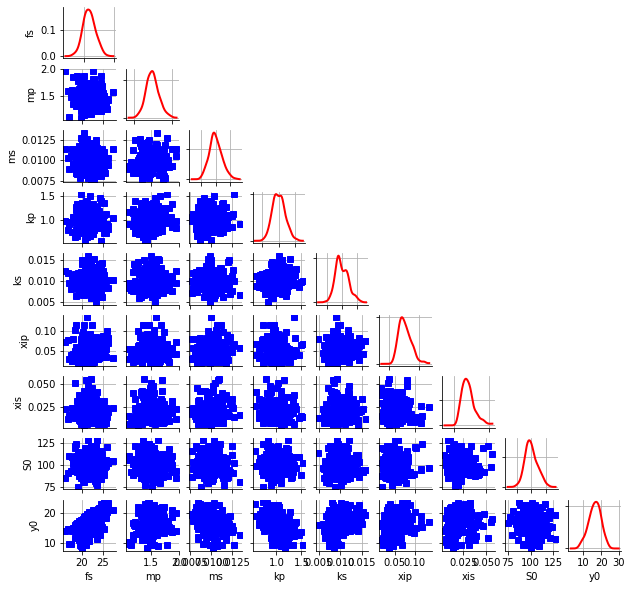

In [9]:
marginal_distribution = ot.ComposedDistribution(
    [
        ot.KernelSmoothing().build(full_sample.getMarginal(i))
        for i in range(1 + dimension)
    ]
)
clouds = ot.VisualTest.DrawPairsMarginals(full_sample, marginal_distribution)
view = otv.View(clouds, figure_kw={"figsize": (10.0, 10.0)})

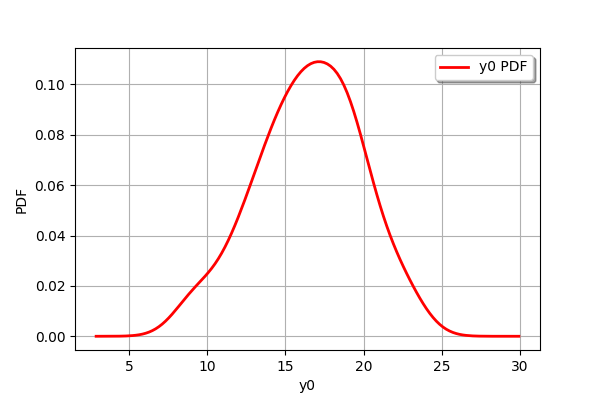

In [10]:
output_distribution = ot.KernelSmoothing().build(outputDesign)
output_distribution.drawPDF()

## Perform sensitivity analysis

In [11]:
# Create X/Y data
ot.RandomGenerator.SetSeed(0)
size = 10000
inputDesign = ot.SobolIndicesExperiment(distribution, size).generate()
outputDesign = model(inputDesign)

In [12]:
# Compute first order indices using the Saltelli estimator
sensitivityAnalysis = ot.SaltelliSensitivityAlgorithm(inputDesign, outputDesign, size)
computed_first_order = sensitivityAnalysis.getFirstOrderIndices()
computed_total_order = sensitivityAnalysis.getTotalOrderIndices()

In [13]:
# Compare with exact results
print("Sample size : ", size)
# First order
# Compute absolute error (the LRE cannot be computed,
# because S can be zero)
print("Computed first order = ", computed_first_order)
print("Exact first order = ", exact_first_order)
# Total order
print("Computed total order = ", computed_total_order)
print("Exact total order = ", exact_total_order)

Sample size :  10000
Computed first order =  [0.374562,0.0347833,0.0853286,0.186227,0.120467,0.0435548,0.0358234,0.0046747]
Exact first order =  [0.4,0.03,0.09,0.18,0.12,0.05,0.05,0]
Computed total order =  [0.375082,0.0778498,0.127115,0.279971,0.201359,0.0667148,0.0458139,0.00812675]
Exact total order =  [0.4,0.04,0.1,0.23,0.16,0.07,0.06,0.01]


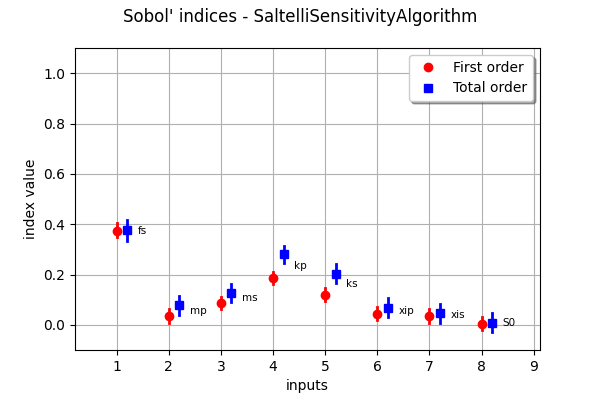

In [14]:
sensitivityAnalysis.draw()